In [2]:
import numpy as np
import matplotlib.pyplot as plt


gamma = 0.9


class Env(object):
    def __init__(self):
        self.world_size = 5
        self.A_pos = [0, 1]
        self.A_n_pos = [4, 1]
        self.B_pos = [0, 3]
        self.B_n_pos = [2, 3]
        # 构建P(s'|s, a)和R(r|s, a)
        # 这是确定性的动态转移矩阵
        # 这里用前两维表示状态，第三维表示动作
        # 本节使用了动态规划的方法，因此P和R对Agent也是已知的
        # 动作上，0:N, 1:S, 2:W, 3:E
        self.P = np.empty((self.world_size, self.world_size, 4), dtype=np.object)
        self.R = np.zeros((self.world_size, self.world_size, 4))
        for i in range(self.world_size):
            for j in range(self.world_size):
                for a in range(4):
                    s = [i, j]
                    if a == 0:  # North
                        if i == 0:
                            s_n = s
                            r = -1
                        else:
                            s_n = [i - 1, j]
                            r = 0
                    elif a == 1:  # South
                        if i == self.world_size - 1:
                            s_n = s
                            r = -1
                        else:
                            s_n = [i + 1, j]
                            r = 0
                    elif a == 2:  # West
                        if j == 0:
                            s_n = s
                            r = -1
                        else:
                            s_n = [i, j - 1]
                            r = 0
                    else:     # East
                        if j == self.world_size - 1:
                            s_n = s
                            r = -1
                        else:
                            s_n = [i, j + 1]
                            r = 0
                    if s == self.A_pos:
                        s_n = self.A_n_pos
                        r = 10
                    elif s == self.B_pos:
                        s_n = self.B_n_pos
                        r = 5

                    self.P[i, j, a] = s_n
                    self.R[i, j, a] = r
    
    def random_strategy(self):
        Pi = np.random.randint(0, 4, (self.world_size,self.world_size))
        return Pi

    def strategy_asses(self, Pi):
        v = np.zeros((self.world_size,self.world_size))
        delta = 100
        while delta > 1e-6:
            v_pre = v.copy()
            for i in range(self.world_size):
                for j in range(self.world_size):
                    s_n = self.P[i, j, Pi[i, j]]
                    v[i, j] = self.R[i, j, Pi[i, j]] + gamma*v[s_n[0],s_n[1]]
            delta = np.linalg.norm(v - v_pre)
        
        return v
    
    def question2(self):
        Pi = self.random_strategy()
        np.set_printoptions(precision=3, suppress=True)
        print(self.strategy_asses(Pi))
    
    def question3(self):
        Pi = self.random_strategy()
        Pi_copy = np.ones((Pi.shape)) * 999

        average_v_history = []

        while not (Pi_copy == Pi).all():
            Pi_copy = Pi.copy()
            v = self.strategy_asses(Pi)
            for i in range(self.world_size):
                for j in range(self.world_size):
                    candidate_action = [self.R[i,j,k] + gamma * v[self.P[i, j, k][0], self.P[i, j, k][1]] for k in range(4)]     
                    Pi[i, j] = np.argmax(candidate_action)
            average_v_history.append(np.mean(v))

        self.print_strategy(Pi)
        np.set_printoptions(precision=2, suppress=True)
        print('最优值函数：\n', v)
        return average_v_history

    def question4(self, draw=True):

        average_v_history = []
        delta = 100
        v = np.zeros((self.world_size, self.world_size))
        v_next = np.zeros((self.world_size, self.world_size))
        while delta > 1e-7:
            for i in range(self.world_size):
                for j in range(self.world_size):
                    candidate_action = [self.R[i,j,k] + gamma * v[self.P[i, j, k][0], self.P[i, j, k][1]] for k in range(4)]     
                    v_next[i, j] = max(candidate_action)
            average_v_history.append(np.mean(v))
            delta = np.linalg.norm(v_next - v)
            v = v_next.copy()

        np.set_printoptions(precision=2, suppress=True)
        print('最优值函数：\n', v)
        return average_v_history


    def question5(self):
        average_v_history = []
        delta = 100
        v = np.zeros((self.world_size, self.world_size))
        while delta > 1e-7:
            v_pre = v.copy()
            for i in range(self.world_size):
                for j in range(self.world_size):
                    candidate_action = [self.R[i,j,k] + gamma * v[self.P[i, j, k][0], self.P[i, j, k][1]] for k in range(4)]     
                    v[i, j] = max(candidate_action)
            average_v_history.append(np.mean(v))
            delta = np.linalg.norm(v_pre - v)

        np.set_printoptions(precision=2, suppress=True)
        print('最优值函数：\n', v)
        return average_v_history

    def draw_line(self, v_history):
        plt.plot(v_history)
        plt.xlabel('step')
        plt.ylabel('average_v')
        plt.title('curve')
        plt.show()

    def print_strategy(self, Pi):
        print("策略：")
        strategy_map = {"0": "↑","1":"↓","2":"←","3":"→"}
        for i in range(self.world_size):
            for j in range(self.world_size):
                print(strategy_map[str(Pi[i, j])], end=' ')
            print('\n')    


env = Env()

最优值函数：
 [[21.98 24.42 21.98 19.42 17.48]
 [19.78 21.98 19.78 17.8  16.02]
 [17.8  19.78 17.8  16.02 14.42]
 [16.02 17.8  16.02 14.42 12.98]
 [14.42 16.02 14.42 12.98 11.68]]
策略：
→ ↑ ← ↑ ← 

→ ↑ ↑ ← ← 

→ ↑ ↑ ↑ ↑ 

→ ↑ ↑ ↑ ↑ 

→ ↑ ↑ ↑ ↑ 

最优值函数：
 [[21.98 24.42 21.98 19.42 17.48]
 [19.78 21.98 19.78 17.8  16.02]
 [17.8  19.78 17.8  16.02 14.42]
 [16.02 17.8  16.02 14.42 12.98]
 [14.42 16.02 14.42 12.98 11.68]]
最优值函数：
 [[21.98 24.42 21.98 19.42 17.48]
 [19.78 21.98 19.78 17.8  16.02]
 [17.8  19.78 17.8  16.02 14.42]
 [16.02 17.8  16.02 14.42 12.98]
 [14.42 16.02 14.42 12.98 11.68]]


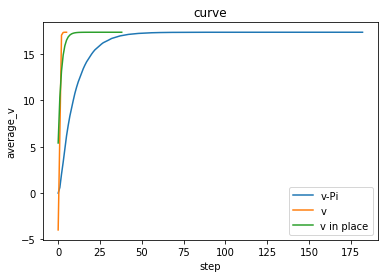

In [3]:
v_curve3 = env.question4()
v_curve4 = env.question3()
v_curve5 = env.question5()
plt.plot(v_curve3)
plt.plot(v_curve4)
plt.plot(v_curve5)
plt.legend(['v-Pi','v','v in place'])
plt.xlabel('step')
plt.ylabel('average_v')
plt.title('curve')
plt.show()